# Chess Data Set

In this notebook, I will be exploring the chess data set. This is not really a serious project but rather me just testing and exploring data analysis on a cool sport that I like.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-chess-games/chess_games.csv


# Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('/kaggle/input/online-chess-games/chess_games.csv')

In [4]:
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   game_id            20058 non-null  int64 
 1   rated              20058 non-null  bool  
 2   turns              20058 non-null  int64 
 3   victory_status     20058 non-null  object
 4   winner             20058 non-null  object
 5   time_increment     20058 non-null  object
 6   white_id           20058 non-null  object
 7   white_rating       20058 non-null  int64 
 8   black_id           20058 non-null  object
 9   black_rating       20058 non-null  int64 
 10  moves              20058 non-null  object
 11  opening_code       20058 non-null  object
 12  opening_moves      20058 non-null  int64 
 13  opening_fullname   20058 non-null  object
 14  opening_shortname  20058 non-null  object
 15  opening_response   1207 non-null   object
 16  opening_variation  14398 non-null  objec

<Axes: xlabel='rated', ylabel='count'>

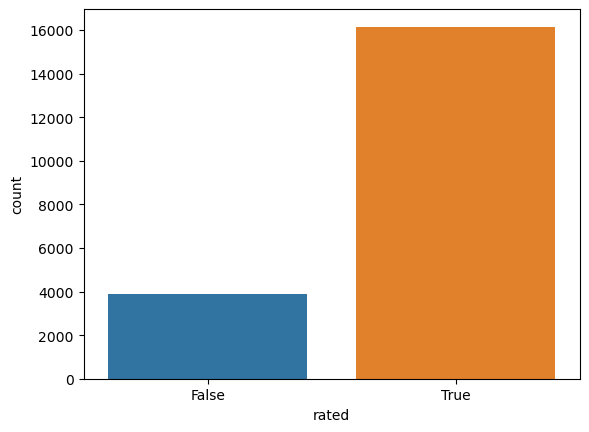

In [6]:
# Checking out some basic things of the dataset
sns.countplot(x = df['rated'])

<Axes: xlabel='white_rating', ylabel='Count'>

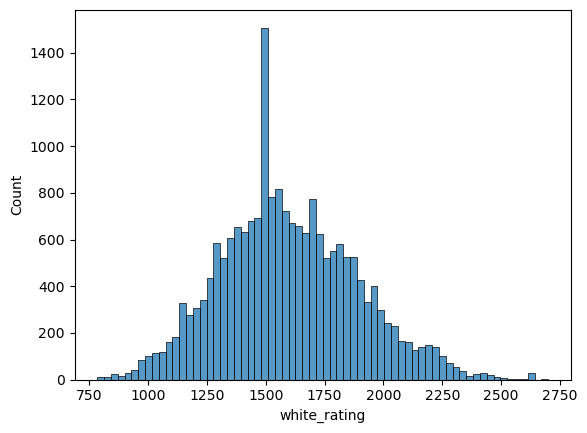

In [7]:
sns.histplot(x = df['white_rating'])

<Axes: xlabel='black_rating', ylabel='Count'>

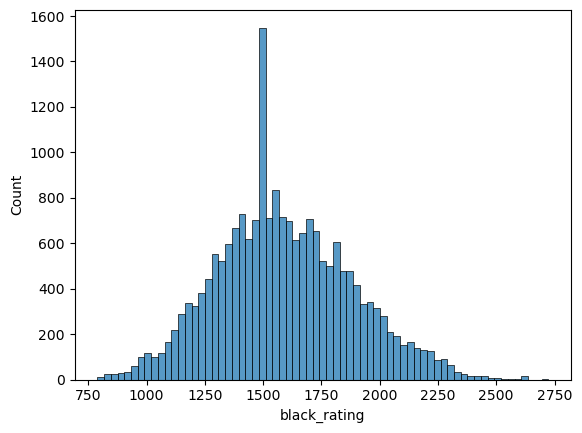

In [8]:
sns.histplot(x = df['black_rating'])

We can see that black and white ratings are distributed relatively equally.

In [9]:
avg_white_rating = str(round(np.average(df['white_rating'])))
avg_black_rating = str(round(np.average(df['black_rating'])))

print("Average white rating: " + avg_white_rating)
print("Average black rating: " + avg_black_rating)

Average white rating: 1597
Average black rating: 1589


In [10]:
df['opening_fullname'].value_counts()

Van't Kruijs Opening                                              368
Sicilian Defense                                                  358
Sicilian Defense: Bowdler Attack                                  296
Scotch Game                                                       271
French Defense: Knight Variation                                  271
                                                                 ... 
Sicilian Defense: Kupreichik Variation                              1
Modern Defense: Lizard Defense |  Mittenberger Gambit               1
French Defense: Rubinstein Variation |  Kasparov Attack             1
French Defense: Tarrasch Variation |  Open System |  Main Line      1
Sicilian Defense: Najdorf Variation |  Polugaevsky Variation        1
Name: opening_fullname, Length: 1477, dtype: int64

In [11]:
df['opening_shortname'].value_counts()

Sicilian Defense       2632
French Defense         1412
Queen's Pawn Game      1233
Italian Game            981
King's Pawn Game        917
                       ... 
Valencia Opening          1
Australian Defense        1
Doery Defense             1
Pterodactyl Defense       1
Global Opening            1
Name: opening_shortname, Length: 128, dtype: int64

In [12]:
df['opening_shortname'].value_counts().head(50)

Sicilian Defense         2632
French Defense           1412
Queen's Pawn Game        1233
Italian Game              981
King's Pawn Game          917
Queen's Gambit            912
Ruy Lopez                 858
English Opening           720
Scandinavian Defense      716
Philidor Defense          691
Caro-Kann Defense         597
Scotch Game               465
Four Knights Game         370
Van't Kruijs Opening      368
Zukertort Opening         336
Bishop's Opening          323
Indian Game               319
Pirc Defense              288
Russian Game              252
Slav Defense              240
King's Gambit             237
Modern Defense            225
Nimzowitsch Defense       224
Horwitz Defense           209
King's Indian Defense     197
Alekhine Defense          192
King's Knight Opening     183
Hungarian Opening         179
Center Game               172
Owen Defense              171
Nimzo-Larsen Attack       164
Bird Opening              157
Nimzo-Indian Defense      157
Vienna Gam

As we can see, even in the top 50 opening_shortname, the value_counts() is still relatively high. This indicates that after the top 3, it is quite fairly distributed amongst the openings.

Let's visualize the distribution of the top 10 openings based on the winners:

<Axes: xlabel='winner', ylabel='count'>

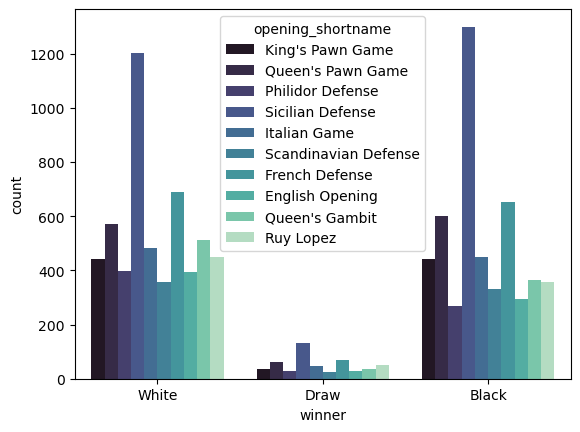

In [13]:
top_10_openings = df[(df['opening_shortname'] == 'Sicilian Defense') | 
                     (df['opening_shortname'] == 'French Defense') |
                     (df['opening_shortname'] == 'Queen\'s Pawn Game') | 
                     (df['opening_shortname'] == 'Italian Game') | 
                     (df['opening_shortname'] == 'King\'s Pawn Game') | 
                     (df['opening_shortname'] == 'Queen\'s Gambit') | 
                     (df['opening_shortname'] == 'Ruy Lopez') | 
                     (df['opening_shortname'] == 'English Opening') | 
                     (df['opening_shortname'] == 'Scandinavian Defense') | 
                     (df['opening_shortname'] == 'Philidor Defense')]
sns.countplot(data = top_10_openings,
              x = 'winner',
              hue = 'opening_shortname',
              palette = 'mako')

In [14]:
# See how many games started as a Sicilian Defense and has white as the winner
top_10_openings[(top_10_openings['opening_shortname'] == 'Sicilian Defense') & 
                (top_10_openings['winner'] == 'White')]['game_id'].count()

1203

In [15]:
# See how many games started as a Sicilian Defense and has black as the winner
top_10_openings[(top_10_openings['opening_shortname'] == 'Sicilian Defense') & 
                (top_10_openings['winner'] == 'Black')]['game_id'].count()

1299

In [16]:
def winner_percentage_by_opening(df, opening):
    """Takes in the dateframe df and the name of the shortname of an opening as opening. Then returns the values of total games that started as opening as total, as well as the total number games where white is the winner, black is the winner, and ended as a draw as the variables white, black, and draw respectively."""
    total = len(df[df['opening_shortname'] == opening])
    white = len(df[(df['opening_shortname'] == opening) & (df['winner'] == 'White')])
    black = len(df[(df['opening_shortname'] == opening) & (df['winner'] == 'Black')])
    draw = len(df[(df['opening_shortname'] == opening) & (df['winner'] == 'Draw')])
    return white, black, draw, total

In [17]:
unique_openings = df['opening_shortname'].unique()

In [18]:
# This was just for testing
#for opening in unique_openings:
    #white, black, draw, total = winner_percentage_by_opening(df, opening)
    #print("White winning percentage when playing", opening, "is", white/total*100)
    #print("Black winning percentage when playing", opening, "is", black/total*100)
    #print("Draw percentage when playing", opening, "is", draw/total*100)
    #print('\n')

From the function I just created, we can see the winning results percentages based on the opening. Now, let's turn this into a dataframe for better readability and interactibility.

In [19]:
result_by_opening = pd.DataFrame(columns=['White (%)', 'Black (%)', 'Draw (%)'])

In [20]:
for opening in unique_openings:
    white, black, draw, total = winner_percentage_by_opening(df, opening)
    result_by_opening.loc[opening] = [round((white/total)*100,2),
                                      round((black/total)*100,2),
                                      round((draw/total)*100,2)]

In [21]:
result_by_opening

,White (%),Black (%),Draw (%)
Slav Defense,46.25,46.25,7.50
Nimzowitsch Defense,65.62,30.80,3.57
King's Pawn Game,47.98,48.09,3.93
Queen's Pawn Game,46.23,48.82,4.95
Philidor Defense,57.31,38.64,4.05
...,...,...,...
King's Indian,66.67,33.33,0.00
Barnes Opening,50.00,0.00,50.00
Canard Opening,50.00,50.00,0.00
Pterodactyl Defense,100.00,0.00,0.00


## More EDA for fun

In [22]:
df[['rated', 'turns',  'white_rating', 'black_rating', 'opening_moves']].corr()

,rated,turns,white_rating,black_rating,opening_moves
rated,1.000000,0.090698,0.003284,0.032655,-0.001906
turns,0.090698,1.000000,0.129753,0.160467,0.055999
white_rating,0.003284,0.129753,1.000000,0.634171,0.277379
black_rating,0.032655,0.160467,0.634171,1.000000,0.255396
opening_moves,-0.001906,0.055999,0.277379,0.255396,1.000000


<Axes: >

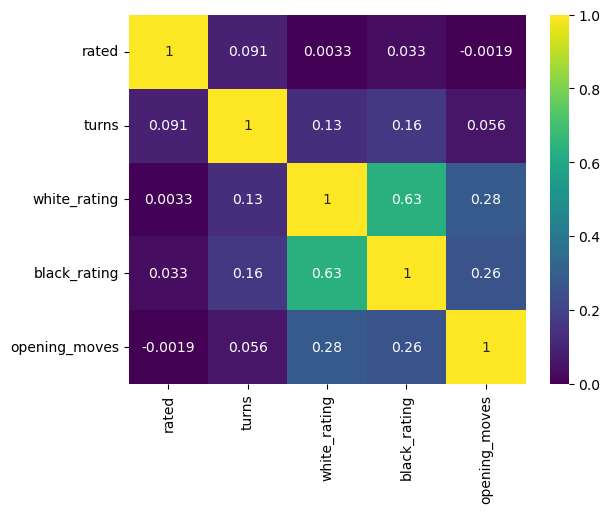

In [23]:
sns.heatmap(data = df[['rated', 'turns',  'white_rating', 'black_rating', 'opening_moves']].corr(),
            annot = True, 
            cmap= 'viridis')

There is a correlation between white_rating and black_rating which makes sense since people typically play against others that have similar ratings.

<Axes: xlabel='white_rating', ylabel='black_rating'>

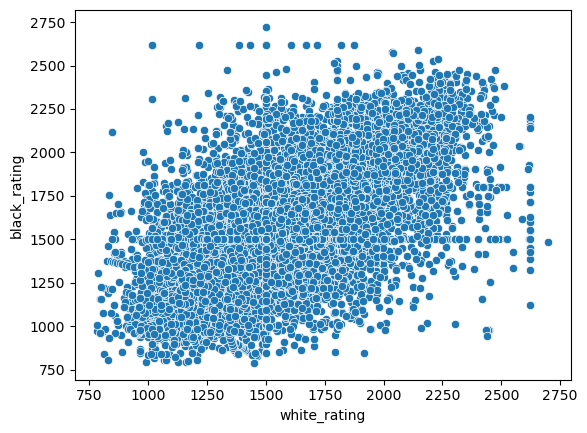

In [24]:
sns.scatterplot(data = df, x = 'white_rating', y = 'black_rating')

I want to know the different distribution of winnners based on skill level. For this, I will be seperating the data based on their rating. Since both the white and black pieces have their own rating, I will measure the rating of each individual game itself by averaging the white and black rating. Then, I will be seperating these average ratings into 4 categories:
* Beginner: 0-2000 ELO
* Intermediate: 1201-1800 ELO
* Advanced: 1801-2200 ELO
* Expert: >2200 ELO

In [25]:
df['average_rating'] = (df['white_rating'] + df['black_rating'])/2

In [26]:
def find_skill(rating):
    """This function takes in the rating of a game and returns a skill level as follows: 1) Beginner: 0<=rating<=1200, 2) Intermediate: 1200<rating<=1800, 3) 1800<rating<=2200, and 4) 2200<rating."""
    if rating<=1200:
        return 'Beginner'
    if 1200<rating and rating<=1800:
        return 'Intermediate'
    if 1800<rating and rating<=2200:
        return 'Advanced'
    return 'Expert'

In [27]:
df['skill_level'] = df['average_rating'].apply(find_skill)
df['skill_level'].value_counts()

Intermediate    14429
Advanced         4186
Beginner         1173
Expert            270
Name: skill_level, dtype: int64

<Axes: xlabel='skill_level', ylabel='count'>

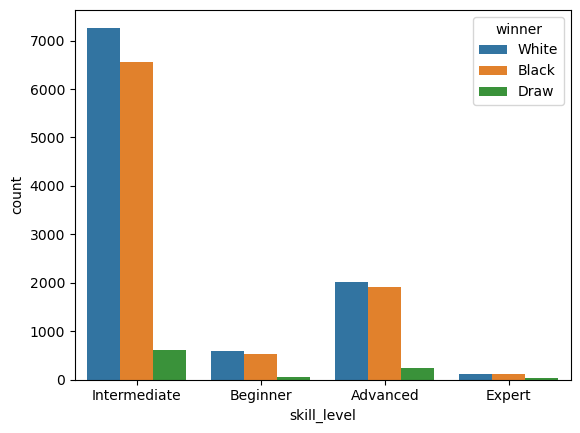

In [28]:
sns.countplot(data = df, x = 'skill_level', hue = 'winner')

As we can see, excluding the Expert skill_level, those who play with white has a slightly higher chance of winning compared to those who play with the black pieces. From pure visual observation as well, it seems to look like at the Beginner level, there are more definitive games (not draws) compared to the other skill levels. Let us verify this:

In [29]:
def winner_by_skill(df, skill):
    """This function takes in dataframe df and skill level as skill. Then returns the values of total games that started as opening as total, as well as the total number games where white is the winner, black is the winner, and ended as a draw as the variables white, black, and draw respectively."""
    total = len(df[df['skill_level'] == skill])
    white = len(df[(df['skill_level'] == skill) & (df['winner'] == 'White')])
    black = len(df[(df['skill_level'] == skill) & (df['winner'] == 'Black')])
    draw = len(df[(df['skill_level'] == skill) & (df['winner'] == 'Draw')])
    return total, white, black, draw

In [30]:
result_by_skill = pd.DataFrame(columns=['White (%)', 'Black (%)', 'Draw (%)'])

In [31]:
for skill in df['skill_level'].unique():
    total, white, black, draw = winner_by_skill(df, skill)
    result_by_skill.loc[skill] = [round((white/total)*100,2),
                                  round((black/total)*100,2),
                                  round((draw/total)*100,2)]

In [32]:
result_by_skill

,White (%),Black (%),Draw (%)
Intermediate,50.38,45.42,4.20
Beginner,50.04,44.84,5.12
Advanced,48.35,45.70,5.95
Expert,44.44,42.59,12.96


As expected, the beginner level has the highest definitive games. Conversely, the expert level has the highest number of draws which is expected in chess as at the highest level of the game, both players know the best possible moves which often leads to a draw. Also, these numbers prove that white does have a slightly higher win rate compared to black.As expected, the beginner level has the highest definitive games. Conversely, the expert level has the highest number of draws which is expected in chess as at the highest level of the game, both players know the best possible moves which often leads to a draw. Also, these numbers prove that white does have a slightly higher win rate compared to black.

# Data Cleaning

I will first start by getting rid of features that I believe to be redundant in creating any type of model regarding the game of chess. This includes the player ids as I am not aiming to analyze individual skill, rather the connection between openings, colors, results, and other aspects of chess as a whole. Later, I will be creating a model to predict the result of the game based on the other features. I will now go through the data cleaning process and get rid of unwanted data:

In [33]:
df.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation,average_rating,skill_level
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation,1345.5,Intermediate
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation,1291.5,Intermediate
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation,1498.0,Intermediate
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation,1446.5,Intermediate
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN,1496.0,Intermediate


In [34]:
df = df.drop(['game_id','white_id', 'black_id'], axis = 1)

I will also be dropping the moves as specific move orders are not being focused on in this analysis.

In [35]:
df = df.drop('moves', axis = 1)

Furthermore, opening_code seems redundant as well so it will also be dropped. And opening_fullname is essentially a combination of opening_shortname and opening_variation so I could either drop the full name or the combination of shortname and variation. I think I'll drop the fullname because the short name is more often used in the community and is therefore easier to understand and work with.

In [36]:
df = df.drop(['opening_code', 'opening_fullname'], axis = 1)

In [37]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_moves,opening_shortname,opening_response,opening_variation,average_rating,skill_level
0,False,13,Out of Time,White,15+2,1500,1191,5,Slav Defense,NaN,Exchange Variation,1345.5,Intermediate
1,True,16,Resign,Black,5+10,1322,1261,4,Nimzowitsch Defense,NaN,Kennedy Variation,1291.5,Intermediate
2,True,61,Mate,White,5+10,1496,1500,3,King's Pawn Game,NaN,Leonardis Variation,1498.0,Intermediate
3,True,61,Mate,White,20+0,1439,1454,3,Queen's Pawn Game,NaN,Zukertort Variation,1446.5,Intermediate
4,True,95,Mate,White,30+3,1523,1469,5,Philidor Defense,NaN,NaN,1496.0,Intermediate


In [38]:
df.isnull().sum()

rated                    0
turns                    0
victory_status           0
winner                   0
time_increment           0
white_rating             0
black_rating             0
opening_moves            0
opening_shortname        0
opening_response     18851
opening_variation     5660
average_rating           0
skill_level              0
dtype: int64

In [39]:
len(df)

20058

In [40]:
df['opening_response'].unique()

array([nan, 'Refused', 'Accepted', 'Declined'], dtype=object)

As we can see, most of the openings do not have an opening_response. Additionally, the only options in opening_response are 'Refused', 'Accepted', and 'Declined' for the gambit openings. I believe that this feature is unneccessary.

In [41]:
df = df.drop('opening_response', axis = 1)

In [42]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_moves,opening_shortname,opening_variation,average_rating,skill_level
0,False,13,Out of Time,White,15+2,1500,1191,5,Slav Defense,Exchange Variation,1345.5,Intermediate
1,True,16,Resign,Black,5+10,1322,1261,4,Nimzowitsch Defense,Kennedy Variation,1291.5,Intermediate
2,True,61,Mate,White,5+10,1496,1500,3,King's Pawn Game,Leonardis Variation,1498.0,Intermediate
3,True,61,Mate,White,20+0,1439,1454,3,Queen's Pawn Game,Zukertort Variation,1446.5,Intermediate
4,True,95,Mate,White,30+3,1523,1469,5,Philidor Defense,NaN,1496.0,Intermediate


In [43]:
df.isnull().sum()

rated                   0
turns                   0
victory_status          0
winner                  0
time_increment          0
white_rating            0
black_rating            0
opening_moves           0
opening_shortname       0
opening_variation    5660
average_rating          0
skill_level             0
dtype: int64

In [44]:
df['opening_variation'].nunique()

615

In [45]:
df['opening_shortname'].nunique()

128

There are too many variations in opening_variation to keep. It would've been better if we kept the opening_fullname instead. But the point is that the amount of variety (in the sense that they are a lot of opening_fullname that only has one data point) will not be beneficial to any model.

Furthermore, there are 5560 games out of 20058 games that do NOT have an opening_variation, which is around 25% of the data. This means that it there are too many of these rows to simply drop them.  Furthermore, there are 5560 games out of 20058 games that do NOT have an opening_variation, which is around 25% of the data. This means that it there are too many of these rows to simply drop them.  

Therefore, I will remove the opening_variation feature.Therefore, I will remove the opening_variation feature.

In [46]:
df = df.drop('opening_variation', axis = 1)

In [47]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_moves,opening_shortname,average_rating,skill_level
0,False,13,Out of Time,White,15+2,1500,1191,5,Slav Defense,1345.5,Intermediate
1,True,16,Resign,Black,5+10,1322,1261,4,Nimzowitsch Defense,1291.5,Intermediate
2,True,61,Mate,White,5+10,1496,1500,3,King's Pawn Game,1498.0,Intermediate
3,True,61,Mate,White,20+0,1439,1454,3,Queen's Pawn Game,1446.5,Intermediate
4,True,95,Mate,White,30+3,1523,1469,5,Philidor Defense,1496.0,Intermediate


There is no need for the opening_moves feature since this is based off of the opening anyway.

In [48]:
df = df.drop('opening_moves', axis = 1)

In [49]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_shortname,average_rating,skill_level
0,False,13,Out of Time,White,15+2,1500,1191,Slav Defense,1345.5,Intermediate
1,True,16,Resign,Black,5+10,1322,1261,Nimzowitsch Defense,1291.5,Intermediate
2,True,61,Mate,White,5+10,1496,1500,King's Pawn Game,1498.0,Intermediate
3,True,61,Mate,White,20+0,1439,1454,Queen's Pawn Game,1446.5,Intermediate
4,True,95,Mate,White,30+3,1523,1469,Philidor Defense,1496.0,Intermediate


We will also be dropping both average_rating and skill_level as the former was based off of white_rating and black_rating and the latter was based off of the former's value. Basically, both these features can easily be inferred from white_raing and black_rating.

In [50]:
df = df.drop(['average_rating', 'skill_level'], axis = 1)

In [51]:
df.head()

,rated,turns,victory_status,winner,time_increment,white_rating,black_rating,opening_shortname
0,False,13,Out of Time,White,15+2,1500,1191,Slav Defense
1,True,16,Resign,Black,5+10,1322,1261,Nimzowitsch Defense
2,True,61,Mate,White,5+10,1496,1500,King's Pawn Game
3,True,61,Mate,White,20+0,1439,1454,Queen's Pawn Game
4,True,95,Mate,White,30+3,1523,1469,Philidor Defense


# Categorical Variables

In [52]:
df.select_dtypes(include = 'object').columns

Index(['victory_status', 'winner', 'time_increment', 'opening_shortname'], dtype='object')

I will now create dummy variables for victory_status:

In [53]:
df['victory_status'].unique()

array(['Out of Time', 'Resign', 'Mate', 'Draw'], dtype=object)

In [54]:
victory_dummy = pd.get_dummies(data = df['victory_status'], 
                               drop_first = True, 
                               dtype = float)
df = pd.concat([df.drop('victory_status', axis = 1), victory_dummy],
               axis = 1)

In [55]:
df.head()

,rated,turns,winner,time_increment,white_rating,black_rating,opening_shortname,Mate,Out of Time,Resign
0,False,13,White,15+2,1500,1191,Slav Defense,0.0,1.0,0.0
1,True,16,Black,5+10,1322,1261,Nimzowitsch Defense,0.0,0.0,1.0
2,True,61,White,5+10,1496,1500,King's Pawn Game,1.0,0.0,0.0
3,True,61,White,20+0,1439,1454,Queen's Pawn Game,1.0,0.0,0.0
4,True,95,White,30+3,1523,1469,Philidor Defense,1.0,0.0,0.0


Same process of rated and winner:

In [56]:
rated_dummy = pd.get_dummies(data = df['rated'], 
                             drop_first = True,
                             dtype = float)
df = pd.concat([df.drop('rated', axis = 1), rated_dummy],
               axis = 1)

In [57]:
df.head()

,turns,winner,time_increment,white_rating,black_rating,opening_shortname,Mate,Out of Time,Resign,True
0,13,White,15+2,1500,1191,Slav Defense,0.0,1.0,0.0,0.0
1,16,Black,5+10,1322,1261,Nimzowitsch Defense,0.0,0.0,1.0,1.0
2,61,White,5+10,1496,1500,King's Pawn Game,1.0,0.0,0.0,1.0
3,61,White,20+0,1439,1454,Queen's Pawn Game,1.0,0.0,0.0,1.0
4,95,White,30+3,1523,1469,Philidor Defense,1.0,0.0,0.0,1.0


Now for opening_shortname:

In [58]:
opening_dummy = pd.get_dummies(data = df['opening_shortname'], 
                               drop_first = True,
                               dtype = float)
df = pd.concat([df.drop('opening_shortname', axis = 1), opening_dummy],
               axis = 1)

In [59]:
df.head()

,turns,winner,time_increment,white_rating,black_rating,Mate,Out of Time,Resign,True,Amar Opening,...,Trompowsky Attack,Valencia Opening,Van Geet Opening,Van't Kruijs Opening,Vienna Game,Wade Defense,Ware Defense,Ware Opening,Yusupov-Rubinstein System,Zukertort Opening
0,13,White,15+2,1500,1191,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,Black,5+10,1322,1261,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61,White,5+10,1496,1500,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61,White,20+0,1439,1454,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,95,White,30+3,1523,1469,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's check what other categorical features are left:

In [60]:
df.select_dtypes(include = 'object').columns

Index(['winner', 'time_increment'], dtype='object')

In chess, there are different types of time intervals that somewhat determine the type of chess that is being played. According to chess.com, here are the time formats:
* Bullet: < 1 minute per person
* Blitz: < 10 minutes per person
* Rapid: < 60 minutes per person
* Classical: > 60 minutes per person

There are also time increments where the players get an additional x amount of seconds after each move. This can be seen in the dataframe as the number after the "+" sign in the time_increment feature. For our purposes, I will be ignoring the time increments as they do not provide that much insight into the game of chess and determining the winner. Instead, I will be categorizing the time format into the 4 categories: Bullet, Blitz, Rapid, and Classical.

In [61]:
df['time_increment'] = df['time_increment'].apply(lambda time: time.split('+')[0])

In [62]:
df['time_increment'].unique()

array(['15', '5', '20', '30', '10', '8', '11', '18', '40', '16', '6', '7',
       '45', '25', '12', '2', '9', '180', '17', '3', '60', '90', '14',
       '4', '13', '150', '19', '0', '1', '120', '35', '29', '21'],
      dtype=object)

In [63]:
def categorizing_time(time):
    """This functions takes in time and sorts it into specific time formats as such: 1) Bullet: 0<=time<=1, 2) Blitz: 1<time<10, 3) Rapid: 10<=time<=60, and 4) Classical: time>60. The function will then return theses categories"""
    time = float(time)
    if 0 <= time and time <= 1:
        return "Bullet"
    if 1 < time and time < 10:
        return "Blitz"
    if 10 <= time and time <=60:
        return 'Rapid'
    return 'Classical'

In [64]:
df['time_increment'] = df['time_increment'].apply(categorizing_time)

In [65]:
df['time_increment']

0        Rapid
1        Blitz
2        Blitz
3        Rapid
4        Rapid
         ...  
20053    Rapid
20054    Rapid
20055    Rapid
20056    Rapid
20057    Rapid
Name: time_increment, Length: 20058, dtype: object

In [66]:
df.head()

,turns,winner,time_increment,white_rating,black_rating,Mate,Out of Time,Resign,True,Amar Opening,...,Trompowsky Attack,Valencia Opening,Van Geet Opening,Van't Kruijs Opening,Vienna Game,Wade Defense,Ware Defense,Ware Opening,Yusupov-Rubinstein System,Zukertort Opening
0,13,White,Rapid,1500,1191,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16,Black,Blitz,1322,1261,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61,White,Blitz,1496,1500,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61,White,Rapid,1439,1454,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,95,White,Rapid,1523,1469,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Perfect! Now we have converted the time_increment into something more managable.

In [67]:
time_dummy = pd.get_dummies(data = df['time_increment'],
                            drop_first = True,
                            dtype = float)
df = pd.concat([df.drop('time_increment', axis = 1), time_dummy],
               axis = 1)

In [68]:
df.head()

,turns,winner,white_rating,black_rating,Mate,Out of Time,Resign,True,Amar Opening,Amazon Attack,...,Van't Kruijs Opening,Vienna Game,Wade Defense,Ware Defense,Ware Opening,Yusupov-Rubinstein System,Zukertort Opening,Bullet,Classical,Rapid
0,13,White,1500,1191,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,16,Black,1322,1261,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,61,White,1496,1500,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61,White,1439,1454,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,95,White,1523,1469,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [69]:
df.select_dtypes(include = 'object').columns

Index(['winner'], dtype='object')

In [70]:
len(df.columns)

138

# Creating a Classification Model

Now that we have cleaned our data, it's time to create a model to predict the winner of a given game. There are multiple ways to do this classification, but for today, we will be using a Decision Tree Classifier to sort this out. 

## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = df.drop('winner', axis=1).values
y = df['winner'].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=101)

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtree = DecisionTreeClassifier()

In [75]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
predictions = dtree.predict(X_test)

## Evaluation

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       Black       0.60      0.60      0.60      2773
        Draw       0.74      0.69      0.71       287
       White       0.63      0.63      0.63      2958

    accuracy                           0.62      6018
   macro avg       0.66      0.64      0.65      6018
weighted avg       0.62      0.62      0.62      6018



In [79]:
print(confusion_matrix(y_test, predictions))

[[1675   41 1057]
 [  42  198   47]
 [1052   29 1877]]


As we can see, unfortunately, the model can only predict the result of the games at a 63% accuracy overall. This is not the best accuracy rate that data scientists typically look for but in terms of the game of chess, I would consider it to be not too bad. This is mainly because in the game of chess, there is still a lot of variables and luck at play depending on the players performance from game to game. This holds truer for games in which the two players are at a similar skill level as the game could go either way or maybe even a draw. So, a 63% accurate model is not too bad for a chess game prediction model.

# Conclusion

Here are some of the results that we've discovered in the EDA:
* Most games are rated 
* Average white rating: 1597
* Average black rating: 1589
* The top 3 openings (all with 1000+ occurences unlike the rest of the openings) are:
    * Sicilian Defense: 2632
    * French Defense: 1412
    * Queen's Pawn Opening: 1233
* result_by_opening:

In [80]:
result_by_opening

,White (%),Black (%),Draw (%)
Slav Defense,46.25,46.25,7.50
Nimzowitsch Defense,65.62,30.80,3.57
King's Pawn Game,47.98,48.09,3.93
Queen's Pawn Game,46.23,48.82,4.95
Philidor Defense,57.31,38.64,4.05
...,...,...,...
King's Indian,66.67,33.33,0.00
Barnes Opening,50.00,0.00,50.00
Canard Opening,50.00,50.00,0.00
Pterodactyl Defense,100.00,0.00,0.00


In [81]:
result_by_skill

,White (%),Black (%),Draw (%)
Intermediate,50.38,45.42,4.20
Beginner,50.04,44.84,5.12
Advanced,48.35,45.70,5.95
Expert,44.44,42.59,12.96


* result_by_skill:
    * There are more definitive games at the beginner level
    * There are more drawn games at the expert level
    * The player with the white pieces are slightly more likely to win the game compared to the player with the black pieces
    
After all the EDA, we conducted some data cleaning by getting rid of the following features:
* game_id
* white_id
* black_id
* moves
* opening_code
* opening_fullname
* opening_response
* opening_variation
* opening_moves
* average_rating (that we created)
* skill_level (that we created)

Then, we created dummy variables for the remaining categorical features so that they can be used in creating a model. Here are the categorical variables that we converted into dummy variables:
* victory_status
* rated
* opening_shortname
* time_increment (after we split them into bullet, blitz, rapid, and classical)

Finally, we created a Decision Tree Classifier to classify the results of the games. This is done through training the model using the data that we cleaned with the "winner" feature being the targeted feature. This means that we used all the other features that are not the "winner" feature to predict the "winner" feature, i.e. the outcome/result of that specific game. With the Decision Tree model, we managed to create a model that can predict the outcomes of a game at a 63% accuracy should we provide the model with the necessary predictor features. 

As mentioned before, though a 63% accuracy may not seem as much, I believe that it is quite high for a chess game predicion model as chess games are highly dependent on the players themselves and how they play which can change from game to game.

# Thank you!!!

Hope you enjoyed this analysis and please feel free to check out more of my notebooks on my profile. Have a good day :)